# Hands-on 4

### CS2545 - Data Science ###
### Winter, 2025 ###
### UNB, Fredericton ###

Please complete the following tasks per instructions provided. Please complete the following and submit this notebook (rename filename: handson4-**firstname**-**lastname**.ipynb) to D2L by 11:30 am, March 14. 
</br>
</br>
</br>


**Q1.** Download the file *oscar_winners.json* from Handson 2, which contains information about Orcar winners for the best picture award. Load this file into a pandas dataframe. Then answer the following:

**Q1.1** Show the number of movies in each genre. Note that a movie may belong to multiple  genres.

**Q1.2** Then plot a bar chart showing the number of movies for each genre. The X-axis will represent the genres and Y-axis will show the number of movies.


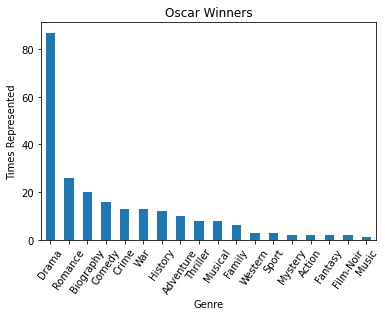

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# write your code below

df1 = pd.read_json("oscar_winners.json")

filtered_df1 = df1['genre'].str.split(', ')


filtered_df2 = filtered_df1.explode()

filtered_df3 = filtered_df2.value_counts()

chart = filtered_df3.plot.bar(rot = 55)

plt.title("Oscar Winners")
plt.xlabel("Genre")
plt.ylabel("Times Represented")
plt.show()






**Q2.** Download *users.csv*  from D2L. The entries in *users*  represent movie reviewers. Load this file into a dataframe by executing the code provided. 

Then, add a column to the dataframe called *agegroup*, where the value of *agegroup* is a label based on the following table. Using this table, you can create relevant intervals (i.e. left-open and right-closed intervals).

Infant: 0-1 <br>
Toddler: 1-3 <br>
Children: 3-12 <br>
Teen: 12-19  <br>
Young-adult: 19-25 <br> 
Adult: 25 - 65 <br>
Senior: 65 - 110 <br>

So, someone aged 13 will be labeled 'Teen' .


In [26]:
import pandas as pd
import numpy as np

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('users.csv', sep='|', names=u_cols)
users
# write your code below
# bins = [0,1,3,12,19,25,65,110]
# names = ['Infant', 'Toddler', 'Children', 'Teen', 'Young-adult', 'Adult', 'Senior']
# categories = pd.cut(users['age'], bins, labels=names)
# categories = categories.value_counts()
# categories
users['agegroup'] = users['age'].apply(lambda x: 'Senior' if x > 65 else 'Adult' if x > 25 else 'Young-adult' if x > 19 else 'Teen' if x > 12 else 'Children' if x > 3 else 'Toddler' if x > 1 else 'Infant')
users


,user_id,age,sex,occupation,zip_code,agegroup
0,1,24,M,technician,85711,Young-adult
1,2,53,F,other,94043,Adult
2,3,23,M,writer,32067,Young-adult
3,4,24,M,technician,43537,Young-adult
4,5,33,F,other,15213,Adult
...,...,...,...,...,...,...
938,939,26,F,student,33319,Adult
939,940,32,M,administrator,02215,Adult
940,941,20,M,student,97229,Young-adult
941,942,48,F,librarian,78209,Adult


**Q3.**  Download the *ratings.csv*  from D2L.  The entries in *ratings* represent the movie ratings given by these reviewers. Load this file into a dataframe by executing the code provided. 

Also, you will need the *users* dataframe with column *agegroup* from  Q2. 

Join these two dataframes to create a new dataframe.


In [27]:
import pandas as pd
import numpy as np

r_cols = ['userId', 'movieId', 'userRating', 'timestamp']
ratings = pd.read_csv('ratings.csv', sep=',', names=r_cols)


# write your code below
df3=pd.merge(ratings,users, how='left', left_on=['userId'], right_on=['user_id'])


df3

,userId,movieId,userRating,timestamp,user_id,age,sex,occupation,zip_code,agegroup
0,1,1,4.0,964982703,1,24,M,technician,85711,Young-adult
1,1,3,4.0,964981247,1,24,M,technician,85711,Young-adult
2,1,6,4.0,964982224,1,24,M,technician,85711,Young-adult
3,1,47,5.0,964983815,1,24,M,technician,85711,Young-adult
4,1,50,5.0,964982931,1,24,M,technician,85711,Young-adult
...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,610,22,M,student,21227,Young-adult
100832,610,168248,5.0,1493850091,610,22,M,student,21227,Young-adult
100833,610,168250,5.0,1494273047,610,22,M,student,21227,Young-adult
100834,610,168252,5.0,1493846352,610,22,M,student,21227,Young-adult


**Q4.**  Using the dataframe in Q3, show the average movie rating for each agegroup. Remove records with NaN fields.

Then plot a bar chart showing the average movie rating on Y-axis, for each agegroup shown on the X-axis.


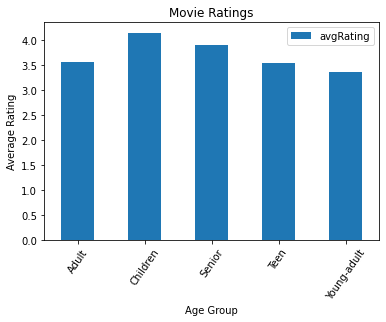

,avgRating
agegroup,
Adult,3.564558
Children,4.145349
Senior,3.891172
Teen,3.538250
Young-adult,3.355917


In [29]:
# write your code below
import pandas as pd
import numpy as np


df4 = df3.groupby('agegroup').agg(avgRating=('userRating', 'mean'))


chart = df4.plot.bar(rot = 55)

plt.title("Movie Ratings")
plt.xlabel("Age Group")
plt.ylabel("Average Rating")
plt.show()
df4
